<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
panelapath = glob.glob('../../data_final/fig3_panel_Ppump.pkl')
panel_a = pickle.load(open(panelapath[0],'rb'))
panel_a.keys()

dict_keys(['xmeas', 'ymeas', 'ymeaslabel', 'xtheo', 'ytheo', 'ytheolabel', 'xtheo2', 'ytheo2', 'ytheolabel2', 'xlabel', 'ylabel'])

In [4]:
panelbpath = glob.glob('../../data_final/fig4_panel_b_v2.pkl')
panel_b = pickle.load(open(panelbpath[0],'rb'))
panel_b.keys()

dict_keys(['xmeas', 'ymeas', 'xtheo', 'ytheo', 'xtheo2', 'ytheo2', 'xlabel', 'ylabel', 'xmin', 'ymin'])

In [5]:
dpi = 1000
figtextsize=10

In [6]:
import matplotlib
cmap = matplotlib.cm.get_cmap('YlGn_r')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


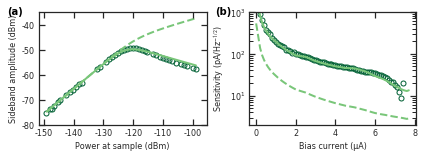

In [7]:
plt.style.use('../my_rcparams.mplstyle')


fig = plt.figure(figsize=cm2inch(17.2,5.3))
gs = gridspec.GridSpec(1,2, wspace=0.25)#, hspace=0.3, height_ratios=[2,1])

axa = fig.add_subplot(gs[0,0])
plt.plot(panel_a['xmeas'],panel_a['ymeas'],'o',markerfacecolor='none',c=cmap(0.1),zorder=-1)
plt.plot(panel_a['xtheo'],panel_a['ytheo'],c=cmap(0.5),zorder=-1)
plt.plot(panel_a['xtheo2'],panel_a['ytheo2'],c=cmap(0.5),ls='dashed',zorder=-1)
plt.xlabel(panel_a['xlabel'])
plt.ylabel('Sideband amplitude (dBm)')
plt.gca().set_ylim(bottom=-80)

axb = fig.add_subplot(gs[0,1])
plt.plot(panel_b['xmeas'],panel_b['ymeas'],'o',markerfacecolor='none',c=cmap(0.1),zorder=-1)
plt.plot(panel_b['xtheo'],panel_b['ytheo'],c=cmap(0.5),zorder=-1)
plt.plot(panel_b['xtheo2'],panel_b['ytheo2'],c=cmap(0.5),ls='dashed',zorder=-1)
plt.xlabel(panel_b['xlabel'])
plt.ylabel('Sensitivity (pA/Hz$^{-1/2}$)')
plt.yscale('log')
plt.gca().set_ylim(top=1e3)

axa.text(-0.14,1, '(a)', fontsize=figtextsize, color='black', weight='bold',transform=axa.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
axb.text(-0.15,1, '(b)', fontsize=figtextsize, color='black', weight='bold', transform=axb.transAxes, verticalalignment = 'center', horizontalalignment = 'center')

plt.savefig('SM_Duffing_on_resonance.pdf',bbox_inches='tight',dpi=dpi)
plt.show()
plt.close()

In [8]:
diff = panel_a['ytheo2']-panel_a['ytheo']
diff.max()

18.725531574306814

In [9]:
panel_b['ytheo2'].min()

2.7918173072635493